In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown


In [4]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [21]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1.jpg', 'with_mask_3267.jpg', 'with_mask_2031.jpg', 'with_mask_734.jpg', 'with_mask_3677.jpg']
['with_mask_3678.jpg', 'with_mask_338.jpg', 'with_mask_2930.jpg', 'with_mask_3206.jpg', 'with_mask_2011.jpg']


In [22]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_127.jpg', 'without_mask_1586.jpg', 'without_mask_2365.jpg', 'without_mask_2616.jpg', 'without_mask_397.jpg']
['without_mask_378.jpg', 'without_mask_3776.jpg', 'without_mask_2491.jpg', 'without_mask_3675.jpg', 'without_mask_2669.jpg']


In [23]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


# **Creating Labels for the two class of Images**

In [24]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [25]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [26]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [27]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


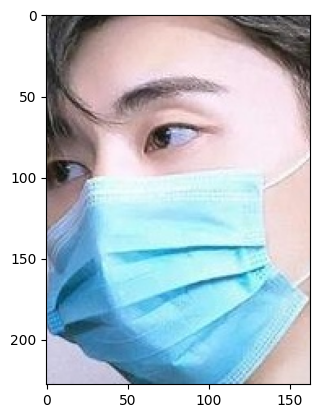

In [28]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

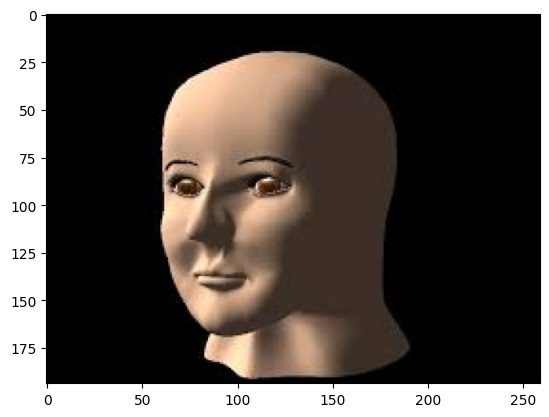

In [19]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2931.jpg')
imgplot = plt.imshow(img)
plt.show()

In [31]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



In [32]:
type(data)

list

In [33]:
len(data)

7553

array([[[50, 58, 31],
        [46, 55, 33],
        [56, 58, 42],
        ...,
        [27, 32, 25],
        [29, 33, 19],
        [33, 40, 17]],

       [[47, 54, 30],
        [49, 58, 36],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [37, 42, 31],
        [31, 41, 23]],

       [[51, 58, 37],
        [50, 59, 37],
        [59, 64, 37],
        ...,
        [45, 44, 30],
        [29, 34, 27],
        [20, 30, 18]],

       ...,

       [[63, 73, 37],
        [66, 75, 41],
        [74, 84, 50],
        ...,
        [ 5,  3,  0],
        [20, 19, 14],
        [17, 16, 12]],

       [[58, 72, 34],
        [60, 70, 39],
        [68, 75, 49],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 30],
        [53, 64, 37],
        [57, 64, 42],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [19, 12, 13]]], dtype=uint8)
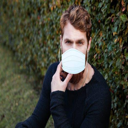

In [34]:
data[0]

In [35]:
type(data[0])

numpy.ndarray

In [36]:
data[0].shape

(128, 128, 3)

In [37]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [38]:
type(X)

numpy.ndarray

In [39]:
type(Y)

numpy.ndarray

In [40]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [41]:
print(Y)

[1 1 1 ... 0 0 0]


In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [43]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [44]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[186, 148, 137],
        [186, 148, 137],
        [186, 148, 137],
        ...,
        [243, 230, 210],
        [246, 232, 214],
        [246, 230, 214]],

       [[186, 148, 137],
        [186, 148, 137],
        [186, 148, 137],
        ...,
        [234, 221, 203],
        [238, 224, 207],
        [241, 224, 208]],

       [[186, 148, 137],
        [186, 148, 137],
        [186, 148, 137],
        ...,
        [240, 227, 211],
        [240, 226, 210],
        [240, 224, 208]],

       ...,

       [[  9, 105,  94],
        [ 13, 102,  96],
        [ 12, 103,  98],
        ...,
        [242, 225, 208],
        [240, 223, 207],
        [240, 223, 207]],

       [[  9, 105,  94],
        [ 13, 102,  96],
        [ 12, 103,  98],
        ...,
        [242, 225, 207],
        [241, 224, 208],
        [240, 223, 207]],

       [[  9, 105,  94],
        [ 13, 102,  96],
        [ 12, 103,  98],
        ...,
        [241, 224, 207],
        [241, 224, 208],
        [240, 223, 207]]], dtype=uint8)
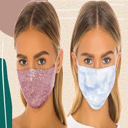

In [45]:
X_train[0]

In [46]:
X_train_scaled[0]

array([[[0.72941176, 0.58039216, 0.5372549 ],
        [0.72941176, 0.58039216, 0.5372549 ],
        [0.72941176, 0.58039216, 0.5372549 ],
        ...,
        [0.95294118, 0.90196078, 0.82352941],
        [0.96470588, 0.90980392, 0.83921569],
        [0.96470588, 0.90196078, 0.83921569]],

       [[0.72941176, 0.58039216, 0.5372549 ],
        [0.72941176, 0.58039216, 0.5372549 ],
        [0.72941176, 0.58039216, 0.5372549 ],
        ...,
        [0.91764706, 0.86666667, 0.79607843],
        [0.93333333, 0.87843137, 0.81176471],
        [0.94509804, 0.87843137, 0.81568627]],

       [[0.72941176, 0.58039216, 0.5372549 ],
        [0.72941176, 0.58039216, 0.5372549 ],
        [0.72941176, 0.58039216, 0.5372549 ],
        ...,
        [0.94117647, 0.89019608, 0.82745098],
        [0.94117647, 0.88627451, 0.82352941],
        [0.94117647, 0.87843137, 0.81568627]],

       ...,

       [[0.03529412, 0.41176471, 0.36862745],
        [0.05098039, 0.4       , 0.37647059],
        [0.04705882, 0

In [47]:
import tensorflow as tf
from tensorflow import keras

In [48]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [50]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - acc: 0.7135 - loss: 0.6199 - val_acc: 0.8909 - val_loss: 0.2705
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.8839 - loss: 0.3006 - val_acc: 0.9008 - val_loss: 0.2386
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9066 - loss: 0.2346 - val_acc: 0.9124 - val_loss: 0.2366
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9218 - loss: 0.1902 - val_acc: 0.9273 - val_loss: 0.1860
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9379 - loss: 0.1570 - val_acc: 0.9273 - val_loss: 0.1903


In [51]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.9010 - loss: 0.2751
Test Accuracy = 0.9119788408279419


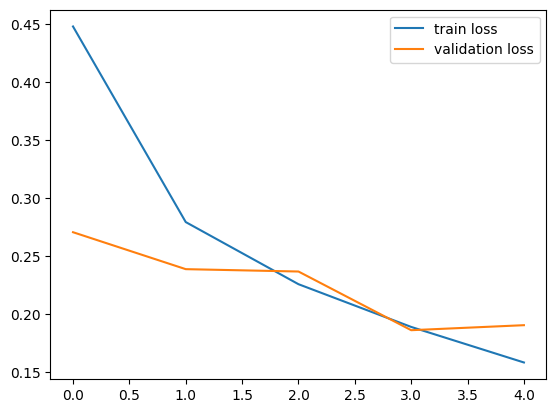

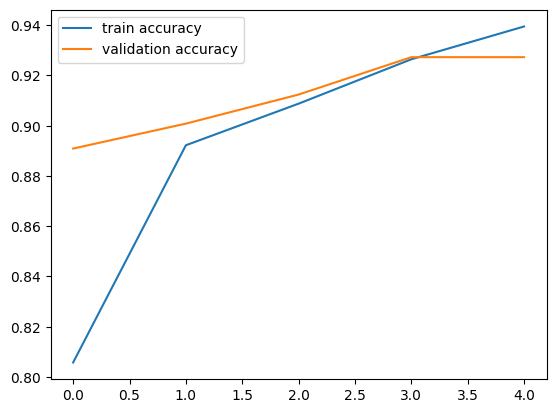

In [52]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

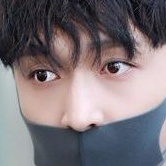

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[0.09200446 0.88508135]]
1
The person in the image is wearing a mask


In [56]:
input_image_path = '/content/data/with_mask/with_mask_1005.jpg'

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

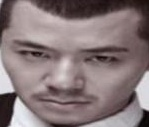

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.5065609  0.46592423]]
0
The person in the image is not wearing a mask


In [57]:
input_image_path = '/content/data/without_mask/without_mask_100.jpg'

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')